# Carga de Datos

## Importación de librerías

In [1]:
import sqlite3
import os.path
import pandas as pd
import matplotlib.pyplot as plt

## Constantes

Rutas usuales que se ocuparán en el notebook

In [2]:
# RUTAS
DATA_PATH = os.path.join("..\\data\\")
WF_FOLDER_PATH = os.path.join(DATA_PATH, "wildfires_us")
WF_DATA_PATH = os.path.join(WF_FOLDER_PATH, "FPA_FOD_20170508.sqlite")

## Funciones auxiliares

In [3]:
def crear_puntero(path=WF_DATA_PATH, msg=False):
    """Función que crea un puntero con el dataset de incendios forestales en US.
    """
    try:
        conn = sqlite3.connect(path)
        if msg: print("Conexión realizada con éxito.")
    except:
        if msg: print("No se encuentra el archivo.")
    return conn

## Primer acercamiento a la BBDD

### Columnas

Cargar una fila para obtener las columnas de la tabla

In [4]:
# Obtener una fila del dataset
conn = crear_puntero(msg=True)
df_aux = pd.read_sql_query(f"SELECT * FROM 'Fires' WHERE FOD_ID=1", conn)
conn.close()

Conexión realizada con éxito.


Columnas a ocupar

In [5]:
# Todas las columnas
columnas = list(df_aux.columns)

# Columnas que se ocuparán en el análisis
columnas_ocupadas = [
    "FIRE_YEAR",        # Año en que el incendio fue descubierto o confirmado
    "DISCOVERY_DATE",   # Fecha en que fue descubiertoel incendio
    "DISCOVERY_DOY",    # Día en que fue descubierto el incendio
    "DISCOVERY_TIME",   # Hora en que fue descubierto el incendio
    "STAT_CAUSE_DESCR", # Descripción de la causa del incendio
    "CONT_DATE",        # Fecha en que se contuvo el incendio
    "CONT_TIME",        # Hora en que se contuvo el incendio
    "FIRE_SIZE",        # Área final estimada que alcanzó el incendio (medido en acres)
    "LATITUDE",         # Latitud de la localización del incendio
    "LONGITUDE",        # Longitud de la localización del incendio
    "STATE",
]

# Columnas que no se ocuparán
columnas_sin_ocupar = [x for x in columnas if x not in columnas_ocupadas]

### Carga de Datos

In [12]:
# str que se ocupará al cargar los datos
columnas_str = ",".join(columnas_ocupadas)

# Obtener una fila del dataset
conn = crear_puntero(msg=True)
df = pd.read_sql_query(f"SELECT {columnas_str} FROM 'Fires'", conn)
conn.close()

# Transformar las fechas en formato Gregoriano
df["DISCOVERY_DATE"] = pd.to_datetime(df["DISCOVERY_DATE"] - pd.Timestamp(0).to_julian_date(), unit='D')
df["CONT_DATE"] = pd.to_datetime(df["CONT_DATE"] - pd.Timestamp(0).to_julian_date(), unit='D')

df.head()

Conexión realizada con éxito.


,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,LATITUDE,LONGITUDE,STATE
0,2005,2005-02-02,33,1300,Miscellaneous,2005-02-02,33.0,1730,0.10,40.036944,-121.005833,CA
1,2004,2004-05-12,133,0845,Lightning,2004-05-12,133.0,1530,0.25,38.933056,-120.404444,CA
2,2004,2004-05-31,152,1921,Debris Burning,2004-05-31,152.0,2024,0.10,38.984167,-120.735556,CA
3,2004,2004-06-28,180,1600,Lightning,2004-07-03,185.0,1400,0.10,38.559167,-119.913333,CA
4,2004,2004-06-28,180,1600,Lightning,2004-07-03,185.0,1200,0.10,38.559167,-119.933056,CA


In [14]:
print(f"El dataset tiene una cantidad de {df.shape[0]} datos y {df.shape[1]} variables.")

El dataset tiene una cantidad de 1880465 datos y 12 variables.


In [7]:
df.describe()

,FIRE_YEAR,DISCOVERY_DOY,CONT_DOY,FIRE_SIZE,LATITUDE,LONGITUDE
count,1.880465e+06,1.880465e+06,988934.000000,1.880465e+06,1.880465e+06,1.880465e+06
mean,2.003710e+03,1.647191e+02,172.656766,7.452016e+01,3.678121e+01,-9.570494e+01
std,6.663099e+00,9.003891e+01,84.320348,2.497598e+03,6.139031e+00,1.671694e+01
min,1.992000e+03,1.000000e+00,1.000000,1.000000e-05,1.793972e+01,-1.788026e+02
25%,1.998000e+03,8.900000e+01,102.000000,1.000000e-01,3.281860e+01,-1.103635e+02
50%,2.004000e+03,1.640000e+02,181.000000,1.000000e+00,3.545250e+01,-9.204304e+01
75%,2.009000e+03,2.300000e+02,232.000000,3.300000e+00,4.082720e+01,-8.229760e+01
max,2.015000e+03,3.660000e+02,366.000000,6.069450e+05,7.033060e+01,-6.525694e+01


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 12 columns):
 #   Column            Dtype         
---  ------            -----         
 0   FIRE_YEAR         int64         
 1   DISCOVERY_DATE    datetime64[ns]
 2   DISCOVERY_DOY     int64         
 3   DISCOVERY_TIME    object        
 4   STAT_CAUSE_DESCR  object        
 5   CONT_DATE         datetime64[ns]
 6   CONT_DOY          float64       
 7   CONT_TIME         object        
 8   FIRE_SIZE         float64       
 9   LATITUDE          float64       
 10  LONGITUDE         float64       
 11  STATE             object        
dtypes: datetime64[ns](2), float64(4), int64(2), object(4)
memory usage: 172.2+ MB


In [16]:
df.isna().sum()

FIRE_YEAR                0
DISCOVERY_DATE           0
DISCOVERY_DOY            0
DISCOVERY_TIME      882638
STAT_CAUSE_DESCR         0
CONT_DATE           891531
CONT_DOY            891531
CONT_TIME           972173
FIRE_SIZE                0
LATITUDE                 0
LONGITUDE                0
STATE                    0
dtype: int64

In [8]:
df["FIRE_YEAR"].describe()

count    1.880465e+06
mean     2.003710e+03
std      6.663099e+00
min      1.992000e+03
25%      1.998000e+03
50%      2.004000e+03
75%      2.009000e+03
max      2.015000e+03
Name: FIRE_YEAR, dtype: float64

In [9]:
df["STAT_CAUSE_DESCR"].describe()

count            1880465
unique                13
top       Debris Burning
freq              429028
Name: STAT_CAUSE_DESCR, dtype: object

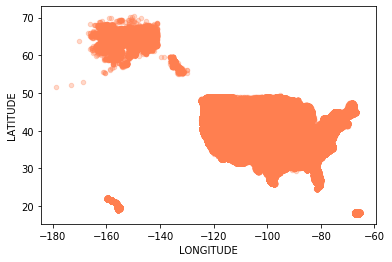

In [10]:
df.plot(kind='scatter',x='LONGITUDE',y='LATITUDE',color='coral',alpha=0.3)
plt.show()